In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Database Rp - sample1.csv")

In [3]:
df.head()

,sr no,Content,target
0,1,"First of all, I want to remind you of your str...",ai
1,2,"You have achieved so much already, and you hav...",ai
2,3,Remember the times when you faced challenges a...,ai
3,4,"At the same time, it's important to acknowledg...",ai
4,5,"During those times, it's okay to take a step b...",ai


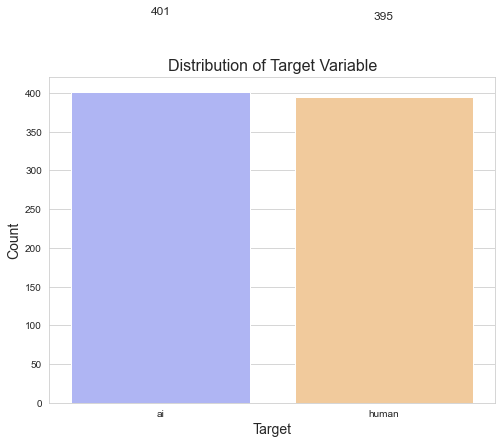

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(8,6))

# Define the colors of the bars in the countplot
colors = ["#a3acff", "#ffcb8e"]

# Create the countplot
sns.countplot(data=df, x="target", palette=colors)

for i in range(len(df["target"].value_counts())):
    count = df["target"].value_counts()[i]
    plt.text(i, count+100, f"{count:,}", ha='center', fontsize=12)


# Set the x and y axis labels
plt.xlabel("Target", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Set the title of the plot
plt.title("Distribution of Target Variable", fontsize=16)

# Show the plot
plt.show()


In [5]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Xfeatures = df['Content']
ylabels = df['target']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)

In [6]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [7]:
pipe_lr.score(x_test,y_test)


0.8619246861924686

In [8]:
pipe_lr.predict(["It often involves feelings of warmth, tenderness, admiration, and a desire to be close to the person you love."])

array(['human'], dtype=object)

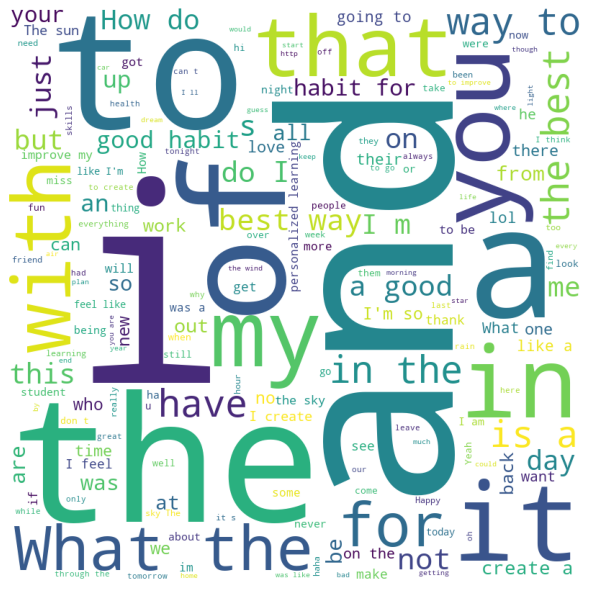

In [9]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df['Content']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()

In [10]:
dfshuffle = df.sample(frac=1, random_state=42)

In [11]:
dfshuffle.head(4)

,sr no,Content,target
692,693,OK! Oops sorry,human
779,780,you could say that. I left it in VT and have b...,human
63,64,The legality of cousin marriage and its accept...,ai
532,533,How long before the Frisbee Golfer 'accidental...,human


In [12]:
df1= df[:69]  # entries from 0 to 68
df2= df[69:]  # entries from 69 to the end


In [13]:
df1.head()

,sr no,Content,target
0,1,"First of all, I want to remind you of your str...",ai
1,2,"You have achieved so much already, and you hav...",ai
2,3,Remember the times when you faced challenges a...,ai
3,4,"At the same time, it's important to acknowledg...",ai
4,5,"During those times, it's okay to take a step b...",ai


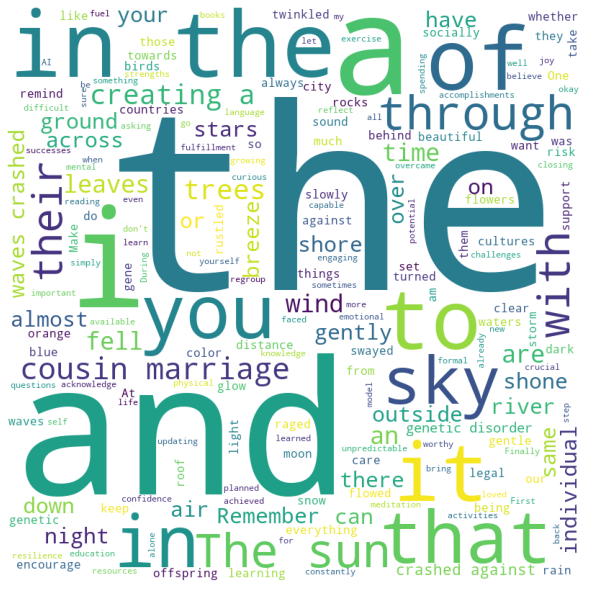

In [14]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df1['Content']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()

In [15]:
df2.head()

,sr no,Content,target
69,70,"Ultimately, whether or not to marry a cousin i...",ai
70,71,Bantu has grown up suffering his father Valmik...,human
71,72,He moves into their mansion to protect them fr...,human
72,73,"The film, which is a remake of a Telugu film A...",human
73,74,"For 25 years, Valmiki’s son Bantu is trapped i...",human


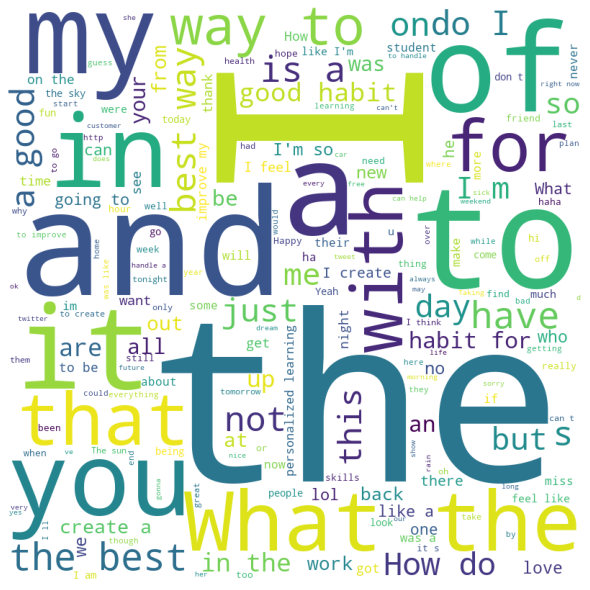

In [16]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df2['Content']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()

In [17]:

Xfeatures = dfshuffle['Content']
ylabels = dfshuffle['target']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)



0.891213389121339

In [18]:
from sklearn.ensemble import RandomForestClassifier

Xfeatures = df['Content']
ylabels = df['target']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.7656903765690377

In [19]:
from sklearn import svm

Xfeatures = df['Content']
ylabels = df['target']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',svm.SVC(kernel='linear', C=1, random_state=0))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.8535564853556485

In [20]:
# Importing necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Creating the pipeline for feature extraction and model training
pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('nn', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
])

# Splitting the data into training and testing sets
Xfeatures = dfshuffle['Content']
ylabels = dfshuffle['target']
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=98)

# Fitting the model to the training data
pipeline.fit(x_train, y_train)

# Evaluating the model on the testing data
score = pipeline.score(x_test, y_test)

# Printing the accuracy score
print("Accuracy: ", score)


Accuracy:  0.9163179916317992


In [21]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from autocorrect import Speller

# Define a list of stopwords
stopwords = set(stopwords.words('english'))

# Define a function to preprocess the text data
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    # Perform spelling correction
    spell = Speller(lang='en')
    words = [spell(word) for word in words]
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Perform stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    # Perform grammar correction
    text = TextBlob(' '.join(words)).correct()
    # Convert back to string format
    text = ' '.join(words)
    return text

# Preprocess the "Content" column of the DataFrame
df["Clean_Content"] = df["Content"].apply(preprocess)


In [22]:
df.head(4)

,sr no,Content,target,Clean_Content
0,1,"First of all, I want to remind you of your str...",ai,first want remind strength accomplish
1,2,"You have achieved so much already, and you hav...",ai,achiev much alreadi much potenti even
2,3,Remember the times when you faced challenges a...,ai,rememb time face challeng overcam let success ...
3,4,"At the same time, it's important to acknowledg...",ai,time import acknowledg life difficult unpredic...


In [23]:
from sklearn import svm

Xfeatures = df['Clean_Content']
ylabels = df['target']
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=98)
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',svm.SVC(kernel='linear', C=1, random_state=0))])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.7573221757322176

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Creating the pipeline for feature extraction and model training
pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('nn', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500))
])

# Splitting the data into training and testing sets
Xfeatures = df['Clean_Content']
ylabels = df['target']
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=98)

# Fitting the model to the training data
pipeline.fit(x_train, y_train)

# Evaluating the model on the testing data
score = pipeline.score(x_test, y_test)

# Printing the accuracy score
print("Accuracy: ", score)

Accuracy:  0.8117154811715481


In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(), min_font_size = 10).generate(' '.join(df['Content']))

# Generate the wordcloud and display it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the plot
plt.show()